<a href="https://colab.research.google.com/github/sulagna206/Assignment/blob/main/M3W2_PE_LR_and_EDA_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# 1. Read the dataset given in file named 'bigcity.csv'.

In [1]:
import pandas as pd


In [3]:
city = pd.read_csv('bigcity.csv')
city.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


# 2. Transform the dataset (0.5 points)
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [ ]:
print("No. of rows : ",city.shape[0])
X = city[['u']]
Y = city[['x']]

# 3. Check the dataset for any missing values and also print out the correlation matrix (0.5 points)
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [10]:
print(city.isna().any())
print(city.corr())

Unnamed: 0    False
u             False
x             False
dtype: bool
            Unnamed: 0         u         x
Unnamed: 0    1.000000 -0.024788 -0.047890
u            -0.024788  1.000000  0.981742
x            -0.047890  0.981742  1.000000


The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 4. Split data into train, test sets (0.5 points)
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)

(39, 1)
(10, 1)


# 5. Find coefficients & intercept (0.5 points)
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
b1 = lr.coef_
b0 = lr.intercept_
print(b1)
print(b0)

[[1.16465537]]
[9.57115437]


# 6.  Linear Relationship between feature and target (0.5 points)
Plot the line with b1 and b0 as slope and y-intercept.

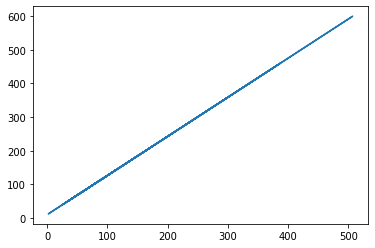

In [23]:
import matplotlib.pyplot as plt
ytrain = lr.predict(X_train)
plt.plot(X_train,ytrain)
plt.show()

# 7. Evaluation of model with scikit-learn (0.5 points)
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
ypred = lr.predict(X_test)
rmse = sqrt(mean_squared_error(Y_test,ypred))
r = r2_score(Y_test,ypred)
print("RMSE = ",rmse,"R2 score = ",r)

RMSE =  18.710703893730713 R2 score =  0.92536721776934


# 8. Calculate the accuracy of the model for both training and test data set (0.5 points)

Hint: .score() function

In [25]:
lr.score(X_test,Y_test)

0.92536721776934

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [34]:
import pandas as pd
import seaborn as sns

# 2. Collect and load data

In [29]:
cars = pd.read_csv('https://sulagna206.github.io/Machine-Learning-with-R-datasets/usedcars.csv')
cars.head()

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO


# 3. Explore numeric variables - five number summary

In [30]:
cars.describe()

,year,price,mileage
count,150.000000,150.000000,150.000000
mean,2008.726667,12961.933333,44260.646667
std,2.200966,3122.481735,26982.104322
min,2000.000000,3800.000000,4867.000000
25%,2008.000000,10995.000000,27200.250000
50%,2009.000000,13591.500000,36385.000000
75%,2010.000000,14904.500000,55124.500000
max,2012.000000,21992.000000,151479.000000


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

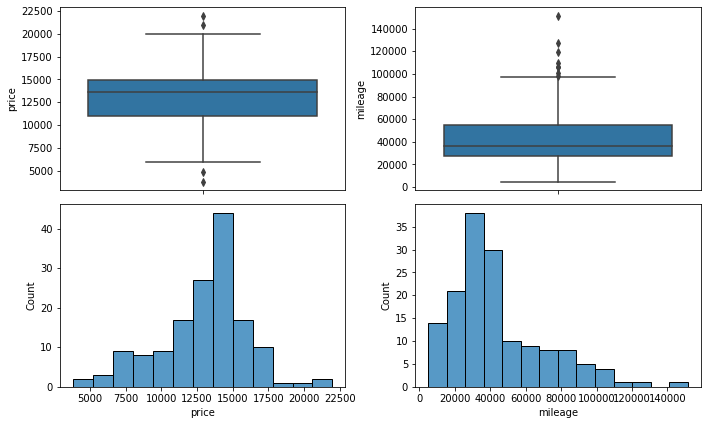

In [41]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.boxplot(y=cars['price'])
plt.subplot(2,2,2)
sns.boxplot(y=cars['mileage'])
plt.subplot(2,2,3)
sns.histplot(cars['price'])
plt.subplot(2,2,4)
sns.histplot(cars['mileage'])
plt.tight_layout()
plt.show()

In [46]:
print("Variance of price = ",(cars['price'].var())," Variance of mileage = ",(cars['mileage'].var()))
print("Variance of price = ",(cars['price'].std())," Variance of mileage = ",(cars['mileage'].std()))

Variance of price =  9749892.183445197  Variance of mileage =  728033953.6394184
Variance of price =  3122.4817346856003  Variance of mileage =  26982.104321928236


# 4. Explore categorical variables

In [47]:
cars.describe(include=['object'])

,model,color,transmission
count,150,150,150
unique,3,9,2
top,SE,Black,AUTO
freq,78,35,128


# 5. Explore relationships between variables using scatterplots and two-way cross tabulations

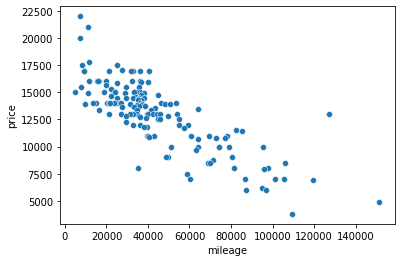

In [48]:
sns.scatterplot(x=cars['mileage'],y=cars['price'],data=cars)
plt.show()